# Zero-Shot Text-to-Image Generation with Stable Diffusion

Stable Diffusion is an advanced text-to-image latent diffusion model developed by researchers and engineers from [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/). Trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) dataset, this model leverages a frozen CLIP ViT-L/14 text encoder to condition its 860M UNet and 123M text encoder components on text prompts. For detailed information, visit the [model card](https://huggingface.co/CompVis/stable-diffusion).

Diffusion models, in general, are machine learning systems designed to iteratively denoise random Gaussian noise to generate samples like images. These models have achieved state-of-the-art performance in image generation tasks. However, the reverse denoising process is computationally expensive and memory-intensive, particularly when generating high-resolution images. This makes both training and inference challenging.

Beyond text-to-image generation, Stable Diffusion also supports tasks such as text-guided image-to-image generation and inpainting. This notebook demonstrates how to perform zero-shot text-to-image generation and text-guided image-to-image transformation using Stable Diffusion.

### Key Objectives of the Notebook

This tutorial walks through the following steps to set up and run Stable Diffusion:

1. **Pipeline Creation**: Set up the Stable Diffusion pipeline using PyTorch models.
2. **Model Conversion**: Prepare the models for efficient inference.
3. **Inference**: Run the Stable Diffusion pipeline showcasing efficient text-to-image and image-to-image generation.




### Table of Contents:

- [Prerequisites](#Prerequisites)
- [Login to Hugging Face Hub](#Login-to-Hugging-Face-Hub)
- [Create PyTorch Models Pipeline](#Create-PyTorch-Models-Pipeline)
- [Model Preparation](#Model-Preparation)
    - [Text Encoder](#Text-Encoder)
    - [U-Net](#U-Net)
    - [VAE](#VAE)
- [Inference Pipeline Setup](#Inference-Pipeline-Setup)
    - [Text-to-Image Generation](#Text-to-Image-Generation)
    - [Image-to-Image Generation](#Image-to-Image-Generation)
- [Interactive Demo](#Interactive-Demo)


## Prerequisites
[back to top ⬆️](#Table-of-Contents)

**The following is required only if you plan to use the original model. Otherwise, you can proceed directly by running the notebook.**

> **Note**:
> The original model (e.g., `stable-diffusion-v1-4`) requires you to accept its license before downloading or using the model weights. Visit the [stable-diffusion-v1-4 card](https://huggingface.co/CompVis/stable-diffusion-v1-4) to review and accept the license before proceeding.
>
> To utilize this diffusion model, you must be a registered user on the 🤗 Hugging Face Hub and provide an access token. Refer to [this documentation](https://huggingface.co/docs/hub/security-tokens) for details on creating and managing access tokens.
>
> To authenticate within a notebook environment, use the following code:

```python
# Login to Hugging Face Hub to access pretrained models
from huggingface_hub import notebook_login, whoami

try:
    whoami()
    print('Authorization token already provided')
except OSError:
    notebook_login()
```

This tutorial employs a Stable Diffusion model fine-tuned on images from Midjourney v4, another popular text-to-image generation solution. More details about this model are available on the [model card](https://huggingface.co/prompthero/openjourney). The same conversion and pipeline execution steps apply to other Stable Diffusion-based solutions.



In [1]:
%pip install -q "openvino>=2023.1.0"
%pip install -q --extra-index-url https://download.pytorch.org/whl/cpu "diffusers>=0.9.0" "torch>=2.1"
%pip install -q "huggingface-hub>=0.9.1"
%pip install -q "gradio>=4.19"
%pip install -q transformers Pillow opencv-python tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Create PyTorch Models Pipeline
[back to top ⬆️](#Table-of-Contents)

The `StableDiffusionPipeline` is a comprehensive, end-to-end inference pipeline that simplifies the process of generating images from text. With minimal code, you can harness the power of advanced diffusion models to create visually compelling outputs.

### Steps to Build the Pipeline

1. **Loading Pre-trained Weights**:
   The first step in setting up the pipeline is to load the pre-trained weights for all the essential components of the model. These components include:
   - **Text Encoder**: This module converts input text prompts into a latent embedding space that the diffusion process can understand and utilize.
   - **UNet Model**: Responsible for the denoising process during the forward and reverse diffusion steps.
   - **Variational Autoencoder (VAE)**: Encodes the generated latent representation into pixel space for image reconstruction.

2. **Pipeline Initialization**:
   Once the components are loaded, integrate them into the `StableDiffusionPipeline` to enable seamless interaction between the modules.

By combining these pre-trained modules, the pipeline ensures optimized and accurate generation of high-quality images from textual descriptions. This modular setup allows users to customize or fine-tune specific components based on their unique requirements.

Below is an example of initializing the pipeline with PyTorch:

```python
from diffusers import StableDiffusionPipeline

# Load the pre-trained pipeline
pipeline = StableDiffusionPipeline.from_pretrained("model_name_here")

# Example of generating an image from text
prompt = "A futuristic cityscape at sunset"
image = pipeline(prompt).images[0]
image.show()
```

With this setup, you can generate creative and detailed images tailored to your input text prompts.



In [2]:
from diffusers import StableDiffusionPipeline
import torch
import gc

# Load and configure the Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("prompthero/openjourney")
pipeline = pipeline.to(torch.device("cpu"))

# Extract and prepare individual components
text_encoder = pipeline.text_encoder
text_encoder.requires_grad_(False)
text_encoder.eval()

unet = pipeline.unet
unet.requires_grad_(False)
unet.eval()

vae = pipeline.vae
vae.requires_grad_(False)
vae.eval()

# Clean up the pipeline object to free memory
del pipeline
gc.collect()



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nitin\.cache\huggingface\hub\models--prompthero--openjourney. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

29

## Convert Models to OpenVINO Intermediate Representation (IR) Format
[back to top ⬆️](#Table-of-Contents)

Starting with the 2023.0 release, OpenVINO introduces support for directly converting PyTorch models to the OpenVINO IR format. While OpenVINO is optional, it provides significant benefits for optimized inference on Intel hardware. You can take advantage of OpenVINO’s advanced optimization tools, but the steps below also allow you to continue using the models without conversion if preferred.

### Why Use OpenVINO?
- **Optional Optimization**: OpenVINO can enhance model performance but is not mandatory for running the pipeline.
- **Efficient Deployment**: Converting models to IR format enables lightweight and fast inference with compressed FP16 weights.

To convert a model to IR format, you need:
1. The PyTorch model object.
2. Input data for tracing the model.
3. Optionally, declarations for the expected input format (shapes, data types).

Conversion involves the `ov.convert_model` function, and the IR model is saved to disk using `ov.save_model`. This optimized representation can then be used for deployment.

### Model Components
The Stable Diffusion model is composed of three key parts:

1. **Text Encoder**: Encodes the text prompt into a latent representation that serves as a condition for image generation.
2. **UNet**: Handles the step-by-step denoising of the latent image representation.
3. **Autoencoder (VAE)**: Encodes the input image into latent space (if required) and decodes the latent representation back into an image after generation.

### Conversion Steps (Optional)
To convert each component to the OpenVINO IR format:

```python
import openvino.runtime as ov
from openvino.tools.mo import convert_model

# Example: Converting and saving the Text Encoder
ov_text_encoder = convert_model(text_encoder, example_input=input_tensor)
ov.save_model(ov_text_encoder, "text_encoder.xml")

# Example: Converting and saving the UNet
ov_unet = convert_model(unet, example_input=input_tensor)
ov.save_model(ov_unet, "unet.xml")

# Example: Converting and saving the VAE
ov_vae = convert_model(vae, example_input=input_tensor)
ov.save_model(ov_vae, "vae.xml")
```

By following these steps, you can optionally integrate OpenVINO into your workflow for optimized deployment while retaining the flexibility to use the original PyTorch models if desired.



### Text Encoder
[back to top ⬆️](#Table-of-Contents)

The **Text Encoder** is a critical component of the Stable Diffusion pipeline, responsible for converting a text prompt, such as "a photo of an astronaut riding a horse," into a latent embedding space. This latent representation serves as a condition that guides the U-Net during the image generation process.

### Key Features and Components
1. **Transformer-Based Architecture**:
   - The text encoder is typically a transformer model, such as CLIP’s text encoder, designed to handle sequences of tokens efficiently.
   - It maps a sequence of input tokens into a sequence of dense vector embeddings that encapsulate the semantic meaning of the input text.

2. **Input Processing**:
   - The input to the text encoder is a tensor, `input_ids`, which contains the token indices generated by a tokenizer.
   - Tokenized inputs are padded to the maximum sequence length supported by the model to ensure uniform input dimensions.

3. **Outputs**:
   - **`last_hidden_state`**: This tensor contains the hidden states from the final Multi-Head Attention layer. It provides a sequence of embeddings corresponding to each token in the input text.
   - **`pooler_output`**: This tensor represents a pooled embedding that summarizes the entire input sequence. It is often used when a single embedding vector is needed for the entire prompt.

### Role in the Pipeline
- The text encoder bridges the gap between natural language and image generation by creating a latent textual representation that aligns with the latent space used by the U-Net.
- This alignment ensures that the generated image matches the semantic intent of the input prompt.

### Example Code
Below is an example of how the text encoder processes input text:

```python
from transformers import CLIPTokenizer, CLIPTextModel

# Load tokenizer and text encoder
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# Tokenize input text
prompt = "a photo of an astronaut riding a horse"
inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)

# Generate embeddings
outputs = text_encoder(**inputs)
last_hidden_state = outputs.last_hidden_state
pooler_output = outputs.pooler_output
```

### Relevant Information
- **Tokenization**: The tokenizer splits input text into smaller units (tokens) and maps each token to a unique index.
- **Latent Space Alignment**: Ensures that the text embeddings produced by the encoder are compatible with the latent space used by the U-Net.
- **Flexibility**: The text encoder can be fine-tuned for domain-specific applications to improve alignment and generation quality.

By efficiently translating textual prompts into a latent representation, the text encoder plays a foundational role in the text-to-image generation process.

In [3]:
from pathlib import Path
import torch
import openvino as ov
import gc

TEXT_ENCODER_OV_PATH = Path("text_encoder.xml")


def cleanup_torchscript_cache():
    """
    Helper function to remove cached model representation.
    """
    torch._C._jit_clear_class_registry()
    torch.jit._recursive.concrete_type_store = torch.jit._recursive.ConcreteTypeStore()
    torch.jit._state._clear_class_state()


def convert_encoder(text_encoder: torch.nn.Module, ir_path: Path):
    """
    Convert Text Encoder model.
    This function takes a text encoder model and prepares example inputs for conversion.

    Parameters:
        text_encoder (torch.nn.Module): Text encoder model from the Stable Diffusion pipeline.
        ir_path (Path): Path to save the converted model.

    Returns:
        None
    """
    # Example input prompt: A custom prompt for testing
    input_ids = torch.randint(low=0, high=49408, size=(1, 50), dtype=torch.long)

    # Switch model to inference mode
    text_encoder.eval()

    # Disable gradient calculations to reduce memory consumption
    with torch.no_grad():
        # Convert the model to OpenVINO IR format
        ov_model = ov.convert_model(
            text_encoder,
            example_input=input_ids,
            input=[
                (1, 50),
            ],
        )
    ov.save_model(ov_model, ir_path)
    del ov_model
    cleanup_torchscript_cache()
    print(f"Text Encoder successfully converted to IR and saved to {ir_path}")

# Check if the IR file already exists; if not, convert the model
if not TEXT_ENCODER_OV_PATH.exists():
    convert_encoder(text_encoder, TEXT_ENCODER_OV_PATH)
else:
    print(f"Text encoder will be loaded from {TEXT_ENCODER_OV_PATH}")

# Clean up memory
del text_encoder
gc.collect()

C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\transformers\modeling_utils.py:4779: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\transformers\modeling_attn_mask_utils.py:88: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if input_shape[-1] > 1 or self.sliding_window is not None:
C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\transformers\modeling_attn_mask_utils.py:164: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the fu

Text Encoder successfully converted to IR and saved to text_encoder.xml


3764

### U-Net
[back to top ⬆️](#Table-of-Contents)

The **U-Net** model is a core component of the Stable Diffusion pipeline. It operates on latent image representations to iteratively refine them during the denoising process. The U-Net model is responsible for transforming the noisy latent image at each timestep into a cleaner representation, progressively moving toward the final generated image.

### Inputs to the U-Net
The U-Net model requires three key inputs:

1. **`sample`**:
   - A latent image sample from the previous step.
   - At the start of the generation process, this input is initialized with random noise.

2. **`timestep`**:
   - Represents the current step in the diffusion schedule.
   - This value determines the noise level and influences how the U-Net processes the latent image.

3. **`encoder_hidden_state`**:
   - The hidden state output from the text encoder.
   - Provides the text prompt's semantic guidance to condition the generation process.

### Model Output
- The U-Net predicts the **`sample`** state for the next step in the generation process.
- By iteratively applying the U-Net across multiple timesteps, the model refines the latent representation until it converges to a meaningful and high-quality image aligned with the input text prompt.

### Example Workflow
1. Initialize `sample` with random noise.
2. Pass the `sample`, `timestep`, and `encoder_hidden_state` to the U-Net.
3. Update the `sample` based on the U-Net's output.
4. Repeat this process across all timesteps in the diffusion schedule.

This iterative refinement enables the generation of complex and high-resolution images from simple noise guided by textual descriptions.



In [4]:
import numpy as np
from pathlib import Path
import torch
import openvino as ov
import gc

UNET_OV_PATH = Path("unet.xml")

dtype_mapping = {torch.float32: ov.Type.f32, torch.float64: ov.Type.f64}

def convert_unet(unet: torch.nn.Module, ir_path: Path):
    """
    Convert U-Net model to OpenVINO IR format.

    Parameters:
        unet (torch.nn.Module): U-Net model from the Stable Diffusion pipeline.
        ir_path (Path): Path to save the converted IR model.

    Returns:
        None
    """
    # Prepare example inputs
    encoder_hidden_state = torch.ones((1, 77, 768))  # Batch size: 1, Sequence length: 77, Embedding size: 768
    latents_shape = (1, 4, 64, 64)  # Batch size: 1, Channels: 4, Height: 64, Width: 64
    latents = torch.randn(latents_shape, dtype=torch.float32)
    timestep = torch.tensor([1], dtype=torch.float32)  # Single timestep

    dummy_inputs = (latents, timestep, encoder_hidden_state)

    # Map inputs to OpenVINO-compatible types
    input_info = []
    for input_tensor in dummy_inputs:
        shape = ov.PartialShape(list(input_tensor.shape))
        element_type = dtype_mapping[input_tensor.dtype]
        input_info.append((shape, element_type))

    # Set model to evaluation mode
    unet.eval()

    # Disable gradients for conversion
    with torch.no_grad():
        # Convert the model to OpenVINO IR format
        ov_model = ov.convert_model(unet, example_input=dummy_inputs, input=input_info)

    # Save the converted model
    ov.save_model(ov_model, ir_path)
    del ov_model
    cleanup_torchscript_cache()
    print(f"U-Net successfully converted to IR and saved to {ir_path}")

# Check if IR file exists; convert if necessary
if not UNET_OV_PATH.exists():
    convert_unet(unet, UNET_OV_PATH)
    gc.collect()
else:
    print(f"U-Net will be loaded from {UNET_OV_PATH}")

# Clean up memory
del unet
gc.collect()



C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\diffusers\models\unets\unet_2d_condition.py:1110: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if dim % default_overall_up_factor != 0:
C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\diffusers\models\downsampling.py:136: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert hidden_states.shape[1] == self.channels
C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\diffusers\models\downsampling.py:145: TracerWarning: Converting a tensor to a Python boolean might cause th

Unet successfully converted to IR and saved to unet.xml


0

### VAE
[back to top ⬆️](#Table-of-Contents)

The **Variational Autoencoder (VAE)** is an integral part of the Stable Diffusion pipeline and consists of two main components:

1. **Encoder**:
   - Converts an input image into a low-dimensional latent representation.
   - This latent representation serves as the input for the U-Net during the diffusion process.

2. **Decoder**:
   - Transforms the latent representation back into a high-dimensional image.
   - This step is used during inference to produce the final output image.

### Role in the Diffusion Process
- **Training Phase**:
  - The encoder is used to derive latent representations (latents) from images, which are then subjected to forward diffusion. During this process, noise is incrementally added at each timestep.

- **Inference Phase**:
  - The reverse diffusion process generates denoised latents. These are then passed through the decoder to reconstruct the final image.
  - In text-to-image generation, no initial image is required. Instead, random noise is directly generated as the starting point, skipping the encoding step.

### Independent Conversion of Encoder and Decoder
As the encoder and decoder operate independently in different parts of the pipeline, it is beneficial to convert them into separate models. This separation allows for optimized usage and simplifies the inference workflow.

### Key Benefits of Independent Models
- **Efficiency**: Reduces memory overhead by loading only the required component during specific pipeline stages.
- **Flexibility**: Enables the encoder and decoder to be fine-tuned or deployed independently for specialized tasks.

This modular approach ensures that the VAE components can be utilized effectively in both training and inference scenarios.



In [5]:
from pathlib import Path
import torch
import openvino as ov
import gc

VAE_ENCODER_OV_PATH = Path("vae_encoder.xml")
VAE_DECODER_OV_PATH = Path("vae_decoder.xml")

def convert_vae_component(vae: torch.nn.Module, ir_path: Path, mode: str):
    """
    Convert VAE component (encoder or decoder) to IR format.

    Parameters:
        vae (torch.nn.Module): VAE model from Stable Diffusion pipeline.
        ir_path (Path): Path to save the converted model.
        mode (str): Specify "encoder" or "decoder" for the conversion.

    Returns:
        None
    """
    class VAEWrapper(torch.nn.Module):
        def __init__(self, vae, mode):
            super().__init__()
            self.vae = vae
            self.mode = mode

        def forward(self, x):
            if self.mode == "encoder":
                return self.vae.encode(x=x)["latent_dist"].sample()
            elif self.mode == "decoder":
                return self.vae.decode(x)

    # Prepare inputs based on the mode
    if mode == "encoder":
        input_tensor = torch.zeros((1, 3, 512, 512))  # Image input
    elif mode == "decoder":
        input_tensor = torch.zeros((1, 4, 64, 64))  # Latent input
    else:
        raise ValueError("Mode must be 'encoder' or 'decoder'")

    # Wrap the VAE model and convert
    vae_wrapper = VAEWrapper(vae, mode)
    vae_wrapper.eval()

    with torch.no_grad():
        ov_model = ov.convert_model(vae_wrapper, example_input=input_tensor, input=[((1,) + input_tensor.shape[1:],)])
    ov.save_model(ov_model, ir_path)
    del ov_model
    cleanup_torchscript_cache()
    print(f"VAE {mode} successfully converted to IR and saved to {ir_path}")

# Convert encoder if not already converted
if not VAE_ENCODER_OV_PATH.exists():
    convert_vae_component(vae, VAE_ENCODER_OV_PATH, "encoder")
else:
    print(f"VAE encoder will be loaded from {VAE_ENCODER_OV_PATH}")

# Convert decoder if not already converted
if not VAE_DECODER_OV_PATH.exists():
    convert_vae_component(vae, VAE_DECODER_OV_PATH, "decoder")
else:
    print(f"VAE decoder will be loaded from {VAE_DECODER_OV_PATH}")

# Clean up memory
del vae
gc.collect()



C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\torch\jit\_trace.py:1303: TracerWarning: Trace had nondeterministic nodes. Did you forget call .eval() on your model? Nodes:
	%2494 : Float(1, 4, 64, 64, strides=[16384, 4096, 64, 1], requires_grad=0, device=cpu) = aten::randn(%2488, %2489, %2490, %2491, %2492, %2493) # C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\diffusers\utils\torch_utils.py:81:0
This may cause errors in trace checking. To disable trace checking, pass check_trace=False to torch.jit.trace()
  _check_trace(
C:\Users\nitin\anaconda3\envs\openvino_env\lib\site-packages\torch\jit\_trace.py:1303: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 10346 / 16384 (63.1%)
Greatest absolute difference: 0.0015298128128051758 at index (0, 1, 0, 63) (up to 1e-05 allowed)
Greatest relative difference: 0.0027706543156865706 at i

VAE encoder successfully converted to IR and saved to vae_encoder.xml
VAE decoder successfully converted to IR and saved to vae_decoder.xml


7063

## Prepare Inference Pipeline
[back to top ⬆️](#Table-of-Contents:)

Putting it all together, let us now take a closer look at how the model works in inference by illustrating the logical flow.


## Text-to-Image Generation

![sd-pipeline](/assets/diagram/pipeline.png)

As depicted in the diagram above, Text-to-Image generation starts with random noise as the initial latent state. The stable diffusion model takes the following inputs:

1. A **latent image representation** of size $64 \times 64$, initialized with random noise.
2. A **text prompt**, which is transformed into text embeddings of size $77 \times 768$ using CLIP's text encoder.

### Workflow

1. The U-Net model iteratively *denoises* the random latent image representations while being conditioned on the text embeddings.
2. The U-Net's output, referred to as the noise residual, is used to compute a denoised latent image representation via a **scheduler algorithm**.
3. The scheduler algorithm refines the latent representation step-by-step.

### Recommended Schedulers
For Stable Diffusion, the following scheduler algorithms are commonly used:

- [PNDM scheduler](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_pndm.py)
- [DDIM scheduler](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_ddim.py)
- [K-LMS scheduler](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_lms_discrete.py) (used in this pipeline)

Although the theoretical workings of scheduler algorithms are beyond the scope of this document, they essentially compute the predicted denoised image representation from the previous noise representation and the predicted noise residual.

For more details, refer to the paper [Elucidating the Design Space of Diffusion-Based Generative Models](https://arxiv.org/abs/2206.00364).

### Denoising Process
The denoising process is repeated a predefined number of times (50 by default) to progressively retrieve better latent image representations. Once this iterative process is complete:

1. The final latent image representation is decoded by the **decoder** part of the Variational Autoencoder (VAE).
2. The result is the generated image, which aligns with the input text prompt.



In [6]:
import inspect
import numpy as np
from typing import List, Optional, Union, Dict
from PIL import Image, ImageOps
from transformers import CLIPTokenizer
from diffusers.pipelines.pipeline_utils import DiffusionPipeline
from diffusers.schedulers import DDIMScheduler, LMSDiscreteScheduler, PNDMScheduler
from openvino.runtime import Model


def scale_fit_to_window(dst_width: int, dst_height: int, img_width: int, img_height: int) -> (int, int):
    """Calculate the dimensions to resize an image while maintaining its aspect ratio."""
    scale = min(dst_height / img_height, dst_width / img_width)
    return int(scale * img_width), int(scale * img_height)


def preprocess(image: Image.Image) -> (np.ndarray, Dict):
    """Preprocess the input image for the pipeline."""
    src_width, src_height = image.size
    dst_width, dst_height = scale_fit_to_window(512, 512, src_width, src_height)

    resized_image = np.array(image.resize((dst_width, dst_height), Image.Resampling.LANCZOS))
    pad_width, pad_height = 512 - dst_width, 512 - dst_height
    padding = ((0, 0), (0, pad_height), (0, pad_width), (0, 0))

    padded_image = np.pad(resized_image[None, :], padding, mode="constant").astype(np.float32)
    normalized_image = 2.0 * (padded_image / 255.0) - 1.0
    final_image = normalized_image.transpose(0, 3, 1, 2)

    return final_image, {"padding": padding, "src_width": src_width, "src_height": src_height}


class OVStableDiffusionPipeline(DiffusionPipeline):
    def __init__(
        self,
        vae_decoder: Model,
        text_encoder: Model,
        tokenizer: CLIPTokenizer,
        unet: Model,
        scheduler: Union[DDIMScheduler, PNDMScheduler, LMSDiscreteScheduler],
        vae_encoder: Optional[Model] = None,
    ):
        super().__init__()
        self.scheduler = scheduler
        self.vae_decoder = vae_decoder
        self.vae_encoder = vae_encoder
        self.text_encoder = text_encoder
        self.unet = unet
        self.tokenizer = tokenizer
        self.height, self.width = 512, 512

    def __call__(
        self,
        prompt: Union[str, List[str]],
        num_inference_steps: int = 50,
        guidance_scale: float = 7.5,
        eta: float = 0.0,
        output_type: str = "pil",
        seed: Optional[int] = None,
        **kwargs,
    ):
        """Generate an image from a text prompt."""
        if seed is not None:
            np.random.seed(seed)

        # Encode prompt text
        text_embeddings = self._encode_prompt(prompt, guidance_scale > 1.0, kwargs.get("negative_prompt"))

        # Set timesteps for the scheduler
        self.scheduler.set_timesteps(num_inference_steps, offset=1)
        timesteps = self.scheduler.timesteps

        # Prepare latents
        latents = np.random.randn(1, 4, self.height // 8, self.width // 8).astype(np.float32)

        # Denoise iteratively
        for t in timesteps:
            latent_input = latents if guidance_scale <= 1.0 else np.concatenate([latents] * 2)
            latent_input = self.scheduler.scale_model_input(latent_input, t)

            noise_pred = self.unet([latent_input, t, text_embeddings])[0]
            if guidance_scale > 1.0:
                noise_pred_uncond, noise_pred_text = noise_pred[0], noise_pred[1]
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

            latents = self.scheduler.step(torch.from_numpy(noise_pred), t, torch.from_numpy(latents), eta=eta)["prev_sample"].numpy()

        # Decode final latents
        decoded_image = self.vae_decoder(latents * 0.18215)[0]
        return self._postprocess_image(decoded_image, output_type)

    def _encode_prompt(self, prompt: Union[str, List[str]], use_guidance: bool, negative_prompt: Optional[Union[str, List[str]]] = None):
        """Encodes the input prompt."""
        text_inputs = self.tokenizer(prompt, padding="max_length", max_length=77, truncation=True, return_tensors="np")
        text_embeddings = self.text_encoder(text_inputs.input_ids)[0]

        if use_guidance:
            uncond_inputs = self.tokenizer(
                negative_prompt or [""],
                padding="max_length",
                max_length=77,
                truncation=True,
                return_tensors="np",
            )
            uncond_embeddings = self.text_encoder(uncond_inputs.input_ids)[0]
            text_embeddings = np.concatenate([uncond_embeddings, text_embeddings])

        return text_embeddings

    def _postprocess_image(self, image: np.ndarray, output_type: str = "pil") -> Union[Image.Image, np.ndarray]:
        """Postprocess the generated image."""
        image = np.clip((image / 2.0 + 0.5) * 255, 0, 255).astype(np.uint8)
        image = image.transpose(0, 2, 3, 1)
        return [Image.fromarray(img) for img in image] if output_type == "pil" else image


## Configure Inference Pipeline
[back to top ⬆️](#Table-of-contents:)


First, you should create instances of OpenVINO Model.

In [7]:
core = ov.Core()

Select device from dropdown list for running inference using OpenVINO.

In [32]:
import ipywidgets as widgets

device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value="CPU",
    description="Device:",
    disabled=False,
)

device

Dropdown(description='Device:', options=('CPU', 'GPU', 'NPU', 'AUTO'), value='CPU')

In [33]:
text_enc = core.compile_model(TEXT_ENCODER_OV_PATH, device.value)

In [34]:
unet_model = core.compile_model(UNET_OV_PATH, device.value)

In [35]:
ov_config = {"INFERENCE_PRECISION_HINT": "f32"} if device.value != "CPU" else {}

vae_decoder = core.compile_model(VAE_DECODER_OV_PATH, device.value, ov_config)
vae_encoder = core.compile_model(VAE_ENCODER_OV_PATH, device.value, ov_config)

Model tokenizer and scheduler are also important parts of the pipeline. Let us define them and put all components together

In [36]:
from transformers import CLIPTokenizer
from diffusers.schedulers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")

ov_pipe = OVStableDiffusionPipeline(
    tokenizer=tokenizer,
    text_encoder=text_enc,
    unet=unet_model,
    vae_encoder=vae_encoder,
    vae_decoder=vae_decoder,
    scheduler=lms,
)

### Text-to-Image generation
[back to top ⬆️](#Table-of-contents:)

Now, you can define a text prompt for image generation and run inference pipeline.
Optionally, you can also change the random generator seed for latent state initialization and number of steps.

> **Note**: Consider increasing `steps` to get more precise results. A suggested value is `50`, but it will take longer time to process.

In [47]:
import ipywidgets as widgets

sample_text = (
    "cyberpunk cityscape like Tokyo New York  with tall buildings at dusk golden hour cinematic lighting, epic composition. "
    "A golden daylight, hyper-realistic environment. "
    "Hyper and intricate detail, photo-realistic. "
    "Cinematic and volumetric light. "
    "Epic concept art. "
    "Octane render and Unreal Engine, trending on artstation"
)
text_prompt = widgets.Text(value=sample_text, description="your text")
num_steps = widgets.IntSlider(min=1, max=50, value=20, description="steps:")
seed = widgets.IntSlider(min=0, max=10000000, description="seed: ", value=42)
widgets.VBox([text_prompt, seed, num_steps])

In [48]:
print("Pipeline settings")
print(f"Input text: {text_prompt.value}")
print(f"Seed: {seed.value}")
print(f"Number of steps: {num_steps.value}")

Pipeline settings
Input text: cyberpunk cityscape like Tokyo New York  with tall buildings at dusk golden hour cinematic lighting, epic composition. A golden daylight, hyper-realistic environment. Hyper and intricate detail, photo-realistic. Cinematic and volumetric light. Epic concept art. Octane render and Unreal Engine, trending on artstation
Seed: 42
Number of steps: 20


In [49]:
result = ov_pipe(text_prompt.value, num_inference_steps=num_steps.value, seed=seed.value)

  0%|          | 0/20 [00:00<?, ?steps/s]

Finally, let us save generation results.
The pipeline returns several results: `sample` contains final generated image, `iterations` contains list of intermediate results for each step.

In [50]:
final_image = result["sample"][0]
if result["iterations"]:
    all_frames = result["iterations"]
    img = next(iter(all_frames))
    img.save(
        fp="result.gif",
        format="GIF",
        append_images=iter(all_frames),
        save_all=True,
        duration=len(all_frames) * 5,
        loop=0,
    )
final_image.save("result.png")

Now is show time!

Input text:
	cyberpunk cityscape like Tokyo New York  with tall buildings at dusk golden hour cinematic lighting, epic composition
	 A golden daylight, hyper-realistic environment
	 Hyper and intricate detail, photo-realistic
	 Cinematic and volumetric light
	 Epic concept art
	 Octane render and Unreal Engine, trending on artstation


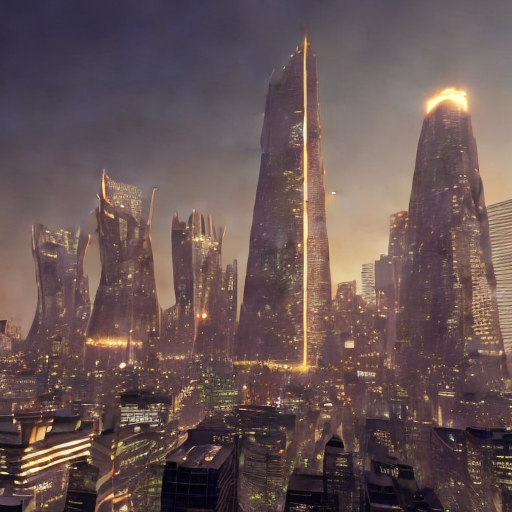

In [51]:
import ipywidgets as widgets

text = "\n\t".join(text_prompt.value.split("."))
print("Input text:")
print("\t" + text)
display(final_image)

Nice. As you can see, the picture has quite a high definition 🔥.

### Image-to-Image generation
[back to top ⬆️](#Table-of-contents:)

Image-to-Image generation, additionally to text prompt, requires providing initial image. Optionally, you can also change `strength` parameter, which is a value between 0.0 and 1.0, that controls the amount of noise that is added to the input image. Values that approach 1.0 enable lots of variations but will also produce images that are not semantically consistent with the input.

In [1]:
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests

# Step 1: Load a simple dataset from Hugging Face
# Using the "huggan/sd-prompt-images" dataset as an example
dataset = load_dataset("LeroyDyer/winogroud_text_to_imaget_BASE64", split="train[:5]")  # Load a small subset for demonstration

# Step 2: Load CLIP model and processor for evaluation
clip_model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

In [3]:
# Step 3: Evaluate generated images using CLIP similarity
results = []

for sample in dataset:
    # Get the image and text prompt
    image = sample["image"]  # Assuming this is already a PIL Image
    prompt = sample["text"]

    # Prepare inputs for CLIP model
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)

    # Extract similarity score
    similarity_score = outputs.logits_per_text.item()
    results.append({"prompt": prompt, "similarity_score": similarity_score})

In [5]:
import pandas as pd

# Save results to a CSV file for visualization
results_df = pd.DataFrame(results)
results_df.to_csv("clip_similarity_results.csv", index=False)

# Optionally, display the DataFrame in your terminal or Jupyter Notebook
print(results_df)


                                              prompt  similarity_score
0                a young person kisses an old person         26.690857
1  the upset one is on the left and the happy one...         24.324020
2                real mustache and fake hair on head         18.496416
3                             toy cat with real baby         25.431149
4         the lion is quiet and the lionness is loud         23.811344


In [52]:
text_prompt_i2i = widgets.Text(value="amazing watercolor painting", description="your text")
num_steps_i2i = widgets.IntSlider(min=1, max=50, value=10, description="steps:")
seed_i2i = widgets.IntSlider(min=0, max=1024, description="seed: ", value=42)
image_widget = widgets.FileUpload(
    accept="",
    multiple=False,
    description="Upload image",
)
strength = widgets.FloatSlider(min=0, max=1, description="strength: ", value=0.5)
widgets.VBox([text_prompt_i2i, seed_i2i, num_steps_i2i, image_widget, strength])

In [19]:
# Fetch `notebook_utils` module
import requests
from notebook_utils import download_file

coco.jpg:   0%|          | 0.00/202k [00:00<?, ?B/s]

Pipeline settings
Input text: amazing watercolor painting
Seed: 42
Number of steps: 10
Strength: 0.5
Input image:


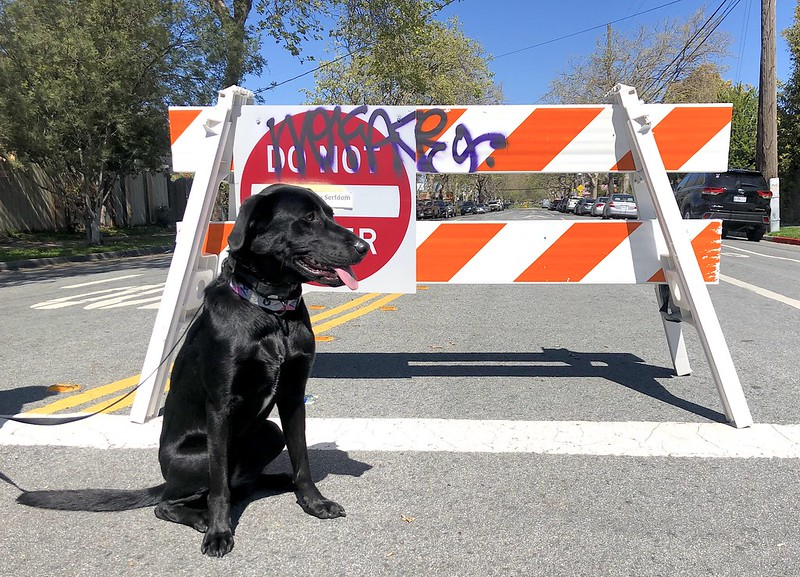

  0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
import io

default_image_path = download_file(
    "./data/coco.jpg",
    filename="coco.jpg",
)

# read uploaded image
image = PIL.Image.open(io.BytesIO(image_widget.value[-1]["content"]) if image_widget.value else str(default_image_path))
print("Pipeline settings")
print(f"Input text: {text_prompt_i2i.value}")
print(f"Seed: {seed_i2i.value}")
print(f"Number of steps: {num_steps_i2i.value}")
print(f"Strength: {strength.value}")
print("Input image:")
display(image)
processed_image = ov_pipe(
    text_prompt_i2i.value,
    image,
    num_inference_steps=num_steps_i2i.value,
    seed=seed_i2i.value,
    strength=strength.value,
)

In [21]:
final_image_i2i = processed_image["sample"][0]
if processed_image["iterations"]:
    all_frames_i2i = processed_image["iterations"]
    img = next(iter(all_frames_i2i))
    img.save(
        fp="result_i2i.gif",
        format="GIF",
        append_images=iter(all_frames_i2i),
        save_all=True,
        duration=len(all_frames_i2i) * 5,
        loop=0,
    )
final_image_i2i.save("result_i2i.png")

Input text:
	amazing watercolor painting


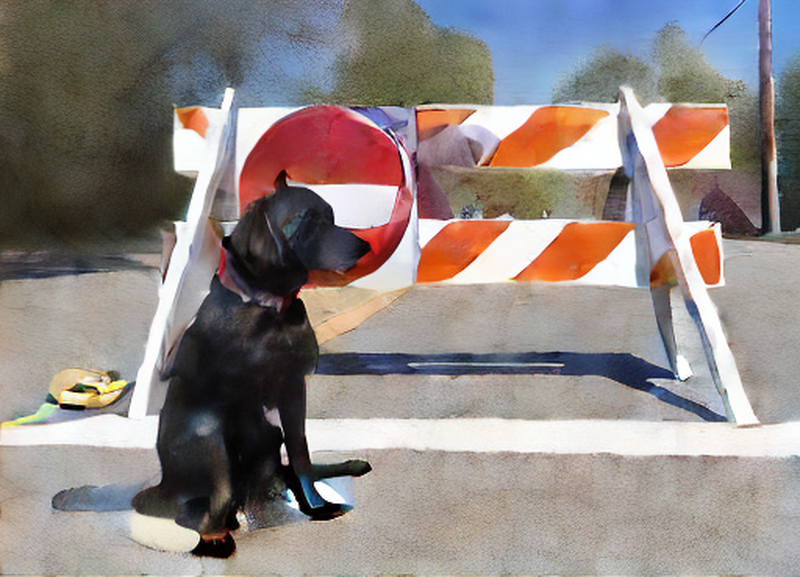

In [22]:
text_i2i = "\n\t".join(text_prompt_i2i.value.split("."))
print("Input text:")
print("\t" + text_i2i)
display(final_image_i2i)

## Interactive demo
[back to top ⬆️](#Table-of-contents:)


In [24]:
import gradio as gr
from datetime import datetime

def generate_from_text(text, seed, num_steps, _=gr.Progress(track_tqdm=True)):
    result = ov_pipe(text, num_inference_steps=num_steps, seed=seed)
    return result["sample"][0]

def generate_from_image(img, text, seed, num_steps, strength, _=gr.Progress(track_tqdm=True)):
    result = ov_pipe(text, img, num_inference_steps=num_steps, seed=seed, strength=strength)
    return result["sample"][0]

# Create a custom header and footer for the web page
def custom_header():
    return f"""
    <div style='text-align: center; padding: 10px; background-color: #2a9d8f;'>
        <h1 style='color: white;'>ZeroShot Text-to-Image Generator</h1>
        <p style='color: #f4a261;'>Generate high-quality images from text or initial images with ease!</p>
    </div>
    """

def custom_footer():
    return f"""
    <div style='text-align: center; padding: 10px; background-color: #264653;'>
        <p style='color: white;'>© {datetime.now().year} ZeroShot Text-to-Image Generator by Nitin Mane and Team | Powered by OpenVINO™</p>
    </div>
    """

# Interactive demo for the Hugging Face hosting
with gr.Blocks() as demo:
    demo.title = "ZeroShot Text-to-Image Generator with OpenVINO™"
    demo.description = "This interactive demo allows you to generate images from text or modify existing images using our custom Stable Diffusion-based model."
    demo.header = custom_header()
    demo.footer = custom_footer()

    with gr.Tab("Text-to-Image Generation"):
        with gr.Row():
            with gr.Column():
                text_input = gr.Textbox(lines=3, label="Enter your text prompt", placeholder="E.g. A fantasy landscape with castles and dragons")
                seed_input = gr.Slider(0, 10000000, value=42, label="Random Seed (for reproducibility)")
                steps_input = gr.Slider(1, 50, value=30, step=1, label="Number of Steps")
            with gr.Column():
                output_image = gr.Image(label="Generated Image", type="pil")
        generate_button = gr.Button("Generate Image")
        generate_button.click(fn=generate_from_text, inputs=[text_input, seed_input, steps_input], outputs=output_image)

    with gr.Tab("Image-to-Image Modification"):
        with gr.Row():
            with gr.Column():
                img_input = gr.Image(label="Upload an Image to Modify", type="pil")
                text_prompt = gr.Textbox(lines=3, label="Text Prompt to Guide Modification", placeholder="E.g. Add watercolor painting effect")
                seed_input = gr.Slider(0, 1024, value=123, label="Random Seed")
                num_steps_input = gr.Slider(1, 50, value=15, step=1, label="Number of Steps")
                strength_input = gr.Slider(0.0, 1.0, value=0.6, step=0.1, label="Transformation Strength")
            with gr.Column():
                modified_output = gr.Image(label="Modified Image")
        modify_button = gr.Button("Apply Modifications")
        modify_button.click(fn=generate_from_image, inputs=[img_input, text_prompt, seed_input, num_steps_input, strength_input], outputs=modified_output)

    # Add an extra panel for feature highlights
    with gr.Accordion("Features of ZeroShot Text-to-Image Generator", open=False):
        gr.Markdown("""
        - **Text-to-Image Generation**: Create beautiful images from any text prompt.
        - **Image-to-Image Modification**: Modify existing images using a text prompt to create artistic variations.
        - **Stable Diffusion Based**: Leveraging the latest advances in text-to-image technology with the Stable Diffusion model.
        - **OpenVINO™ Optimization**: Optimized for Intel hardware to provide fast and efficient image generation.
        - **Reproducibility**: Use random seeds to generate consistent results.
        """)

    gr.Markdown("<br><br>", visible=False)  # Spacer for aesthetics

# Launch the demo for hosting on Hugging Face Spaces
try:
    demo.queue().launch(debug=True, share=True)
except Exception:
    demo.queue().launch(debug=True, server_name="0.0.0.0", server_port=7860, share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


  0%|          | 0/30 [00:00<?, ?steps/s]

Keyboard interruption in main thread... closing server.
